# Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Data Cleaning Example

**Explanation**

- We created a mock dataset with missing values.
- Dropped rows where `Product_ID` is missing (assuming that ID is crucial).
- Filled missing prices with the mean price.
- Filled missing quantity with the median value.

In [2]:
# Suppose we have a dataset about sales with missing values
data = {
    'Product_ID': [101, 102, 103, 104, np.nan],
    'Price': [19.99, 24.99, np.nan, 18.50, 22.00],
    'Quantity': [3, 2, 5, np.nan, 4]
}

df = pd.DataFrame(data)
print("Original Data:")
print(df)

# Drop rows with missing Product_ID
df = df.dropna(subset=['Product_ID'])

# Fill missing Price with the mean price
price_mean = df['Price'].mean()
df['Price'] = df['Price'].fillna(price_mean)

# Fill missing Quantity with a placeholder or median
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())

print("\nCleaned Data:")
print(df)

Original Data:
   Product_ID  Price  Quantity
0       101.0  19.99       3.0
1       102.0  24.99       2.0
2       103.0    NaN       5.0
3       104.0  18.50       NaN
4         NaN  22.00       4.0

Cleaned Data:
   Product_ID  Price  Quantity
0       101.0  19.99       3.0
1       102.0  24.99       2.0
2       103.0  21.16       5.0
3       104.0  18.50       3.0


# 2. Exploratory Data Analysis Example

**Explanation**

- Displaying descriptive statistics (`.describe()`) to see mean, min, max, etc.
- Plotting a simple line chart to visualize trends.

Summary Statistics:
count        5.000000
mean     10291.400000
std       2001.641776
min       8000.000000
25%       9500.000000
50%      10000.000000
75%      10500.000000
max      13457.000000
Name: Visits, dtype: float64


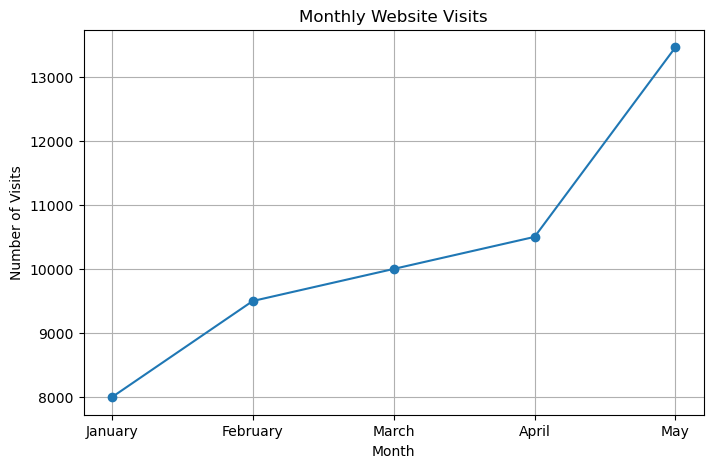

In [4]:
# Example dataset: monthly website visits
data_visits = {
    'Month': ['January', 'February', 'March', 'April', 'May'],
    'Visits': [8000, 9500, 10000, 10500, 13457]
}

df_visits = pd.DataFrame(data_visits)

# Summary statistics
print("Summary Statistics:")
print(df_visits['Visits'].describe())

# Simple line chart
plt.figure(figsize=(8, 5))
plt.plot(df_visits['Month'], df_visits['Visits'], marker='o')
plt.title("Monthly Website Visits")
plt.xlabel("Month")
plt.ylabel("Number of Visits")
plt.grid(True)
plt.show()

# 3. Modeling Example (Linear Regression)

**Explanation**

- Creates a simple dataset for house sizes and corresponding prices.
- Trains a linear regression model to predict house price given square footage.
- Visualizes both the raw data (scatter plot) and the regression line.

c:\Users\bruno\anaconda3\envs\s_w_py10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted price for a 3000 sqft house: $450000.00


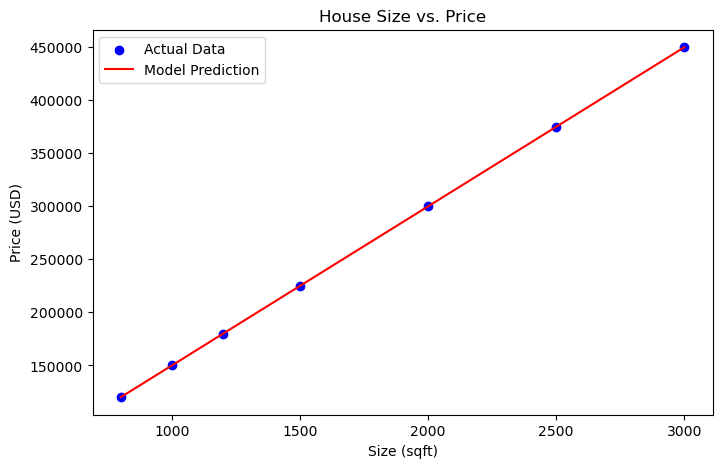

In [6]:
# Example dataset for linear regression: House size vs. House price
house_data = {
    'Size_sqft': [800, 1000, 1200, 1500, 2000, 2500, 3000],
    'Price_USD': [120000, 150000, 180000, 225000, 300000, 375000, 450000]
}

df_house = pd.DataFrame(house_data)

X = df_house[['Size_sqft']]
y = df_house['Price_USD']

# Train a simple linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict for a new house of 3,000 sqft
predicted_price = model.predict([[3000]])
print(f"Predicted price for a 3000 sqft house: ${predicted_price[0]:.2f}")

# Visualize
plt.figure(figsize=(8, 5))
plt.scatter(df_house['Size_sqft'], df_house['Price_USD'],
            color='blue', label='Actual Data')
plt.plot(df_house['Size_sqft'], model.predict(
    X), color='red', label='Model Prediction')
plt.xlabel("Size (sqft)")
plt.ylabel("Price (USD)")
plt.title("House Size vs. Price")
plt.legend()
plt.show()

# 4. Using Generative AI for Data Synthesis (Conceptual Example)

**Explanation**

- The function `generate_synthetic_data` is a simplified illustration.
- Real-world synthetic data often uses advanced generative models (e.g., GANs, diffusion models).
- This code demonstrates how to expand or mimic existing data while preserving its core structure.

In [7]:
# This is a conceptual example; normally you'd use specialized libraries
# such as 'sdv' (Synthetic Data Vault) for sophisticated data synthesis.

# Assume we have a partial dataset of user transactions
user_data = {
    'user_id': [1, 2, 3, 4],
    'age': [25, 37, 29, 42],
    'country': ['USA', 'UK', 'USA', 'Canada'],
    'transaction_amount': [100.50, 250.75, 99.99, 500.00]
}

df_user = pd.DataFrame(user_data)
print("Original Data:")
print(df_user)

# Synthesize new data by adding variations
# (In a real scenario, you'd use machine learning models or generative libraries)


def generate_synthetic_data(df, num_samples=2):
    synthetic_rows = []
    for _ in range(num_samples):
        row = {}
        # Random variations for demonstration
        row['user_id'] = np.random.randint(5, 1000)
        row['age'] = int(np.random.normal(df['age'].mean(), df['age'].std()))
        row['country'] = np.random.choice(df['country'].unique())
        row['transaction_amount'] = abs(round(np.random.normal(df['transaction_amount'].mean(),
                                                               df['transaction_amount'].std()), 2))
        synthetic_rows.append(row)
    return pd.DataFrame(synthetic_rows)


synthetic_data = generate_synthetic_data(df_user, num_samples=5)
print("\nSynthetic Data:")
print(synthetic_data)

Original Data:
   user_id  age country  transaction_amount
0        1   25     USA              100.50
1        2   37      UK              250.75
2        3   29     USA               99.99
3        4   42  Canada              500.00

Synthetic Data:
   user_id  age country  transaction_amount
0      954   47     USA              627.81
1      449   42      UK              135.15
2      983   26  Canada              451.83
3      183   32     USA              440.85
4      632   33     USA              510.01
